In [1]:
!pip install kaggle

In [0]:
!mkdir ~/.kaggle
!mkdir .kaggle

In [3]:
!ls -a

.  ..  .config	.kaggle  sample_data


In [0]:
import json
token = {"username":"jafarodik23","key":"c1a61be355d1963f1b276f53cb73d51e"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json

In [7]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [8]:
!kaggle datasets download -d saroz014/plant-disease -p /content

 99% 1.59G/1.60G [00:23<00:00, 118MB/s]
100% 1.60G/1.60G [00:23<00:00, 72.6MB/s]


In [9]:
!unzip \plant-disease.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43a32428-0d45-4851-bb62-c1a669854990___YLCV_NREC 2630.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43a5145b-57e9-4605-8ba3-1fb90f61d460___YLCV_NREC 0108.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43a73727-237f-40e0-b7e1-95bf4d0eb756___YLCV_GCREC 5343.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43aae6d1-40ae-42f4-8b71-ae9351683a90___UF.GRC_YLCV_Lab 02661.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43b2be62-cb86-46f4-9049-92e77d4f335b___YLCV_NREC 0074.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43b8aec7-59df-413d-9afd-9cbf481695fd___UF.GRC_YLCV_Lab 09423.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43bbb298-8079-42f6-9be7-b88957cc8846___UF.GRC_YLCV_Lab 09341.JPG  
  inflating: dataset/train/Tomato___Tomato_Ye

In [10]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Using TensorFlow backend.


In [0]:
#directories, total:38

Apple___Apple_scab='/content/dataset/train/Apple___Apple_scab'
Apple___Black_rot='/content/dataset/train/Apple___Black_rot'
Apple___Cedar_apple_rust='/content/dataset/train/Apple___Cedar_apple_rust'
Apple___healthy='/content/dataset/train/Apple___healthy'

Blueberry___healthy='/content/dataset/train/Blueberry___healthy'

Cherry___Powdery_mildew='/content/dataset/train/Cherry_(including_sour)___Powdery_mildew'
Cherry___healthy='/content/dataset/train/Cherry_(including_sour)___healthy'

Corn___Cercospora_leaf_spot='/content/dataset/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
Corn___Common_rust='/content/dataset/train/Corn_(maize)___Common_rust_'
Corn___Northern_Leaf_Blight='/content/dataset/train/Corn_(maize)___Northern_Leaf_Blight'
Corn___healthy='/content/dataset/train/Corn_(maize)___healthy'

Grape___Black_rot='/content/dataset/train/Grape___Black_rot'
Grape___Esca='/content/dataset/train/Grape___Esca_(Black_Measles)'
Grape___Leaf_blight='/content/dataset/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
Grape___healthy='/content/dataset/train/Grape___healthy'

Orange___Haunglongbing='/content/dataset/train/Orange___Haunglongbing_(Citrus_greening)'

Peach___Bacterial_spot='/content/dataset/train/Peach___Bacterial_spot'
Peach___healthy='/content/dataset/train/Peach___healthy'

Pepper_bell___Bacterial_spot='/content/dataset/train/Pepper,_bell___Bacterial_spot'
Pepper_bell___healthy='/content/dataset/train/Pepper,_bell___healthy'

Potato___Early_blight='/content/dataset/train/Potato___Early_blight'
Potato___Late_blight='/content/dataset/train/Potato___Late_blight'
Potato___healthy='/content/dataset/train/Potato___healthy'

Raspberry___healthy='/content/dataset/train/Raspberry___healthy'

Soybean___healthy='/content/dataset/train/Soybean___healthy'

Squash___Powdery_mildew='/content/dataset/train/Squash___Powdery_mildew'

Strawberry___Leaf_scorch='/content/dataset/train/Strawberry___Leaf_scorch'
Strawberry___healthy='/content/dataset/train/Strawberry___healthy'

Tomato___Bacterial_spot='/content/dataset/train/Tomato___Bacterial_spot'
Tomato___Early_blight='/content/dataset/train/Tomato___Early_blight'
Tomato___Late_blight='/content/dataset/train/Tomato___Late_blight'
Tomato___Leaf_Mold='/content/dataset/train/Tomato___Leaf_Mold'
Tomato___Septoria_leaf_spot='/content/dataset/train/Tomato___Septoria_leaf_spot'
Tomato___Spider_mites='/content/dataset/train/Tomato___Spider_mites Two-spotted_spider_mite'
Tomato___Target_Spot='/content/dataset/train/Tomato___Target_Spot'
Tomato___Tomato_Yellow_Leaf_Curl_Virus='/content/dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus'
Tomato___Tomato_mosaic_virus='/content/dataset/train/Tomato___Tomato_mosaic_virus'
Tomato___healthy='/content/dataset/train/Tomato___healthy'

In [0]:
X=[]
Z=[]

NUM_CLASSES = 33
CHANNELS = 3
IMG_SIZE = 224

RESNET50_POOLING = 'avg'
RESNET50_WEIGHTS = 'imagenet'
DENSE_LAYER_ACTIVATION = 'relu'
OUTPUT_DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'
LOSS_METRICS = ['accuracy']

LEARNING_RATE = 0.001
BETA1 = 0.9
BETA2 = 0.999

NUM_EPOCHS = 10
BATCH_SIZE = 100

In [0]:
def assign_label(img,plantdisease_type):
    return plantdisease_type
    
def make_train_data(plantdisease_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,plantdisease_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [14]:
print('Apple')
make_train_data('Apple Scab',Apple___Apple_scab)
print(len(X))
make_train_data('Apple Black rot',Apple___Black_rot)
print(len(X))
make_train_data('Apple Cedar rust',Apple___Cedar_apple_rust)
print(len(X))
make_train_data('Apple Healthy',Apple___healthy)
print(len(X))

#print('Blueberry')
#make_train_data('Blueberry Healthy',Blueberry___healthy)
#print(len(X))

#print('Cherry')
#make_train_data('Cherry Powdery mildew',Cherry___Powdery_mildew)
#print(len(X))
#make_train_data('Cherry Healthy',Cherry___healthy)
#print(len(X))

#print('Corn')
#make_train_data('Corn Leaf spot',Corn___Cercospora_leaf_spot)
#print(len(X))
#make_train_data('Corn Common rust',Corn___Common_rust)
#print(len(X))
#make_train_data('Corn Leaf blight',Corn___Northern_Leaf_Blight)
#print(len(X))
#make_train_data('Corn Healthy',Corn___healthy)
#print(len(X))

print('Grape')
make_train_data('Grape Black rot',Grape___Black_rot)
print(len(X))
make_train_data('Grape Esca',Grape___Esca)
print(len(X))
make_train_data('Grape Leaf blight',Grape___Leaf_blight)
print(len(X))
make_train_data('Grape Healthy',Grape___healthy)
print(len(X))

#print('Orange')
#make_train_data('Orange Haunglongbing',Orange___Haunglongbing)
#print(len(X))

#print('Peach')
#make_train_data('Peach Bacterial spot',Peach___Bacterial_spot)
#print(len(X))
#make_train_data('Peach Healthy',Peach___healthy)
#print(len(X))

#print('Pepper bell')
#make_train_data('Pepper bell Bacterial spot',Pepper_bell___Bacterial_spot)
#print(len(X))
#make_train_data('Pepper bell Healthy',Pepper_bell___healthy)
#print(len(X))

print('Potato')
make_train_data('Potato Early blight',Potato___Early_blight)
print(len(X))
make_train_data('Potato Late blight',Potato___Late_blight)
print(len(X))
#make_train_data('Potato Healthy',Potato___healthy)
#print(len(X))

#print('Raspberry')
#make_train_data('Raspberry Healthy',Raspberry___healthy)
#print(len(X))

#print('Soybean')
#make_train_data('Soybean Healthy',Soybean___healthy)
#print(len(X))

#print('Squash')
#make_train_data('Squash Healthy',Squash___Powdery_mildew)
#print(len(X))

#print('Strawberry')
#make_train_data('Strawberry Leaf scorch',Strawberry___Leaf_scorch)
#print(len(X))
#make_train_data('Strawberry Healthy',Strawberry___healthy)
#print(len(X))

print('Tomato')
make_train_data('Tomato Bacterial spot',Tomato___Bacterial_spot)
print(len(X))
#make_train_data('Tomato Early blight',Tomato___Early_blight)
#print(len(X))
#make_train_data('Tomato Late blight',Tomato___Late_blight)
#print(len(X))
#make_train_data('Tomato Leaf mold',Tomato___Leaf_Mold)
#print(len(X))
make_train_data('Tomato Leaf spot',Tomato___Septoria_leaf_spot)
print(len(X))
#make_train_data('Tomato Spider mites',Tomato___Spider_mites)
#print(len(X))
make_train_data('Tomato Target spot',Tomato___Target_Spot)
print(len(X))
#make_train_data('Tomato Leaf curl',Tomato___Tomato_Yellow_Leaf_Curl_Virus)
#print(len(X))
#make_train_data('Tomato Mosaic virus',Tomato___Tomato_mosaic_virus)
#print(len(X))
make_train_data('Tomato Healthy',Tomato___healthy)
print(len(X))

  8%|▊         | 38/504 [00:00<00:01, 379.11it/s]

Apple


 13%|█▎        | 64/497 [00:00<00:00, 637.64it/s]

504


 31%|███▏      | 69/220 [00:00<00:00, 682.26it/s]

1001


  5%|▌         | 69/1316 [00:00<00:01, 689.21it/s]

1221


  7%|▋         | 67/944 [00:00<00:01, 662.33it/s]

2537
Grape


  6%|▌         | 64/1107 [00:00<00:01, 639.39it/s]

3481


  8%|▊         | 66/861 [00:00<00:01, 653.03it/s]

4588


 21%|██        | 71/339 [00:00<00:00, 709.84it/s]

5449


  8%|▊         | 66/800 [00:00<00:01, 657.62it/s]

5788
Potato


  8%|▊         | 66/800 [00:00<00:01, 652.37it/s]

6588


  4%|▍         | 72/1702 [00:00<00:02, 710.19it/s]

7388
Tomato


  5%|▍         | 70/1417 [00:00<00:01, 692.49it/s]

9090


  6%|▌         | 65/1124 [00:00<00:01, 647.80it/s]

10507


  5%|▍         | 58/1273 [00:00<00:02, 579.65it/s]

11631


100%|██████████| 1273/1273 [00:02<00:00, 621.60it/s]

12904


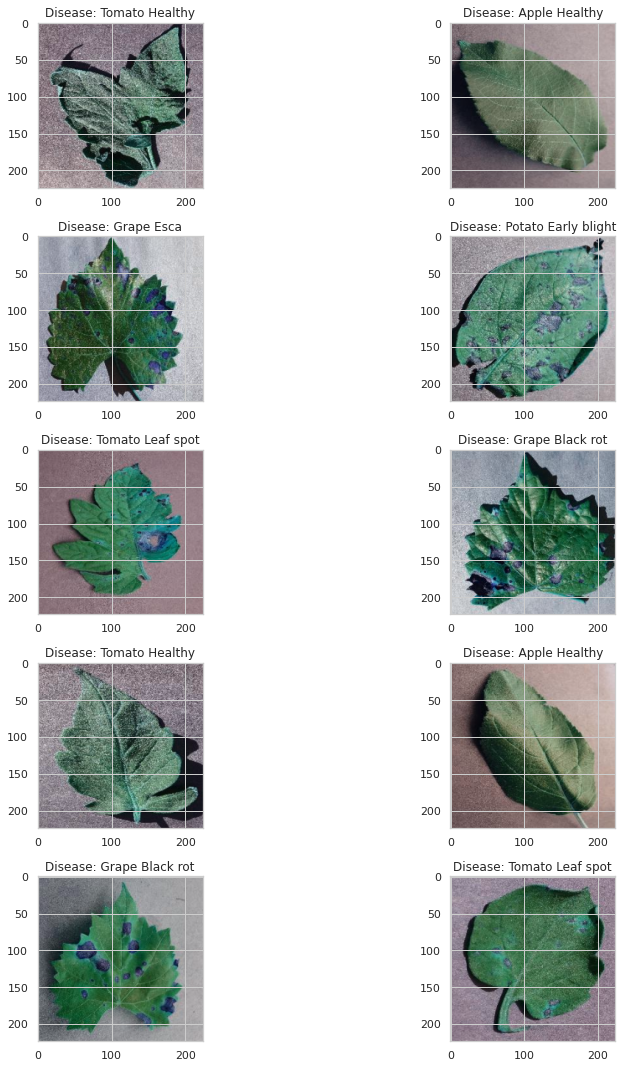

In [15]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Disease: '+Z[l])
        
plt.tight_layout()

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,14)
X=np.array(X)
X=X/255

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)